# Imports

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import csv


from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import shutil

# Load Images

#### Load Test Images

In [2]:
#this works as long as it is inside code/
train_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/train/"
test_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/test/"
images_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/"

classes = os.listdir(train_path)

test_images = []
test_labels = []

with open(images_path + 'Test.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers_test = next(csv_reader, None)  # skip the headers
    for row in csv_reader:

        img = Image.open(images_path + row[-1])

        #Crop image (This is given in the file, not calculated)
        img = img.crop((int(row[2]), int(row[3]), int(row[4]), int(row[5])))

        #needs to resize
        img = img.resize((30, 30))

        #Convert image to grayscale
#         img = img.convert('L')

        #Convert image to numpy array (Feature Extraction)
        img = np.array(img)#.flatten()
        # img.reshape(img.shape[0], 1)

        #Append image to list
        test_images.append(img)

        #Append label to list
        test_labels.append(np.uint8(row[6]))

X_test = np.array(test_images)
y_test = np.array(test_labels)

#### Normalize Data

In [3]:
# Normalize train, validation and test
X_test = X_test/255.

#Converting the labels into one hot encoding
y_test = to_categorical(y_test, len(classes))

#What is the shape of X_train, X_test, Y_train, Y_test
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(y_test.shape))
    
# How many training and test examples ?
print("Number of test examples: " + str(X_test.shape[0]))

X_test shape: (12630, 30, 30, 3)
Y_test shape: (12630, 43)
Number of test examples: 12630


#### Labels

In [4]:
# Labels Translation
classes_translation = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Analyse Dataset

#### Check class distribution in test dataset

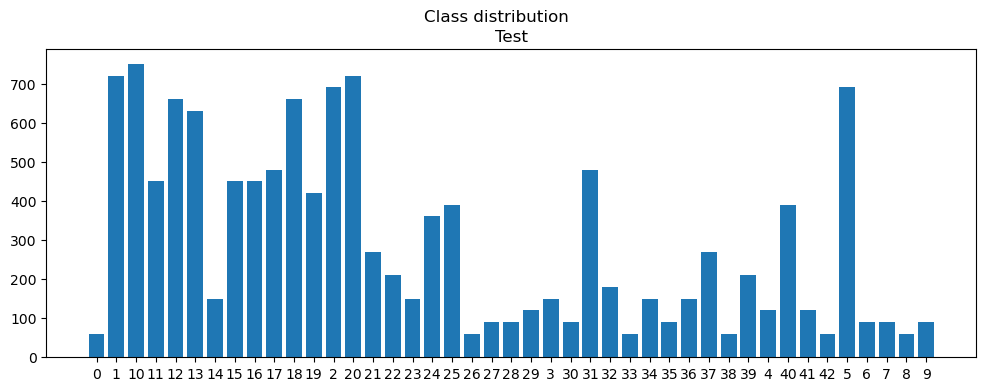

In [6]:
# Check class distribution in test, train and validation
n_samples_test = sum(y_test==1)


fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(classes, n_samples_test)
ax.set_title('Test')
fig.suptitle('Class distribution')
plt.show()


# Models

#### Imports

In [7]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

In [8]:
import h5py
from tensorflow.keras.models import model_from_json, model_from_yaml

# Load model1
h5_file = h5py.File('trained_models/best_models/cnn4_1_98_original.h5', 'r')

json_string = h5_file.attrs['model_config']
model1 = model_from_json(json_string)
model1.load_weights('trained_models/best_models/cnn4_1_98_original.h5')

h5_file.close()

# Load model2
h5_file_2 = h5py.File('trained_models/best_models/cnn3_97.h5', 'r')

json_string = h5_file_2.attrs['model_config']
model2 = model_from_json(json_string)
model2.load_weights('trained_models/best_models/cnn3_97.h5')

h5_file.close()

# Load model3
h5_file_3 = h5py.File('trained_models/best_models/cnn4_1_98_aug.h5', 'r')

json_string = h5_file_3.attrs['model_config']
model3 = model_from_json(json_string)
model3.load_weights('trained_models/best_models/cnn4_1_98_aug.h5')

# Load model4
h5_file_4 = h5py.File('trained_models/best_models/cnn3_96_aug.h5', 'r')

json_string = h5_file_4.attrs['model_config']
model4 = model_from_json(json_string)
model4.load_weights('trained_models/best_models/cnn3_96_aug.h5')

# Load model5
h5_file_5 = h5py.File('trained_models/best_models/cnn3_3_96_aug.h5', 'r')

json_string = h5_file_5.attrs['model_config']
model5 = model_from_json(json_string)
model5.load_weights('trained_models/best_models/cnn3_3_96_aug.h5')

# Load model6
h5_file_6 = h5py.File('trained_models/best_models/cnn3_3_95_original.h5', 'r')

json_string = h5_file_6.attrs['model_config']
model6 = model_from_json(json_string)
model6.load_weights('trained_models/best_models/cnn3_3_95_original.h5')

# Load model7
h5_file_7 = h5py.File('trained_models/best_models/cnn3_2_97_aug.h5', 'r')

json_string = h5_file_7.attrs['model_config']
model7 = model_from_json(json_string)
model7.load_weights('trained_models/best_models/cnn3_2_97_aug.h5')


##### Test model

In [9]:
predicted1 = model1.predict(X_test)
predicted2 = model2.predict(X_test)
predicted3 = model3.predict(X_test)
# predicted4 = model4.predict(X_test)
# predicted5 = model5.predict(X_test)
# predicted6 = model6.predict(X_test)
predicted7 = model7.predict(X_test)

predicted_sum = predicted1 + predicted2 + predicted3 + predicted7

# Compare the predicted class with the real class
predicted_classes = np.argmax(predicted_sum, axis = 1)
real_classes = np.argmax(y_test, axis = 1)

# Print the accuracy
print("Accuracy:", sum(predicted_classes == real_classes)/len(real_classes))

395/395 [==============================] - 8s 19ms/step
Accuracy: 0.9942201108471892


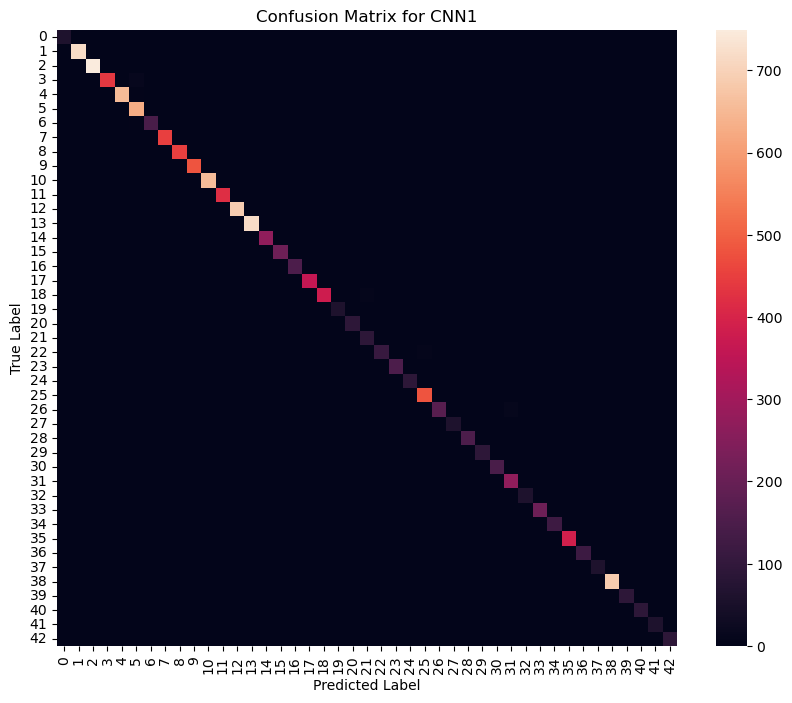

In [21]:
# Model1 confusion matrix
y_pred_classes = predicted_classes
y_true = real_classes
cm = confusion_matrix(y_true, y_pred_classes)


# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, fmt='d')
plt.title('Confusion Matrix for CNN1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy by class
diagonal = np.diag(cm)
# Use the percentage of correct predictions
diagonal = diagonal/cm.sum(axis=1)*100
plt.bar(range(len(diagonal)), diagonal)
plt.xlabel('Class')
plt.ylabel('Number of correct predictions')
plt.title('Accuracy by class for CNN1')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

#### Ensemble models

In [10]:
# Import thread
from threading import Thread
import time

x_sample = X_test[0].reshape(1, X_test[0].shape[0], X_test[0].shape[0], X_test[1].shape[2])
y_sample = y_test[0]

# Use thread to predict using every model simultaneously

# Predict a image using model
def predict(model, x, results, thread_name):
    predicted = model.predict(x)
    results[thread_name] = predicted


start = time.time()
# Create a dictionary to store the results
results = {}

# Create thread
t1 = Thread(target=predict, args=(model1, x_sample, results, 'model1'))
t2 = Thread(target=predict, args=(model2, x_sample, results, 'model2'))
t3 = Thread(target=predict, args=(model3, x_sample, results, 'model3'))
t7 = Thread(target=predict, args=(model7, x_sample, results, 'model7'))

# Start thread
t1.start()
t2.start()
t3.start()
t7.start()

# Wait for thread to finish
t1.join()
t2.join()
t3.join()
t7.join()

# Retrieve the results
predicted1 = results["model1"]
predicted2 = results["model2"]
predicted3 = results["model3"]
predicted7 = results["model7"]

# Sum the prediction
predicted_sum = predicted1 + predicted2 + predicted3 + predicted7

stop = time.time()

# Compare the predicted class with the real class
print("Predicted class:", np.argmax(predicted_sum))
print("Real class:", np.argmax(y_sample))

print("Time:", stop - start)

1/1 [==============================] - 0s 342ms/step
Predicted class: 16
Real class: 16
Time: 0.7889814376831055


In [11]:
from threading import Thread
import time

x_sample = X_test[0].reshape(1, X_test[0].shape[0], X_test[0].shape[0], X_test[1].shape[2])
y_sample = y_test[0]

start = time.time()

predicted1 = model1.predict(x_sample)
predicted2 = model2.predict(x_sample)
predicted3 = model3.predict(x_sample)
predicted7 = model7.predict(x_sample)

predicted_sum = predicted1 + predicted2 + predicted3 + predicted7

stop = time.time()

# Compare the predicted class with the real class
print("Predicted class:", np.argmax(predicted_sum))
print("Real class:", np.argmax(y_sample))

print("Time:", stop - start)


1/1 [==============================] - 0s 97ms/step
Predicted class: 16
Real class: 16
Time: 1.0962085723876953


In [17]:
# Ensemble best model trained with grayscale images and best model trained with augmented images and best model trained with original images
# Load model1
h5_file_1 = h5py.File('trained_models/grayscale/cnn4_1_98.h5', 'r')

json_string = h5_file_1.attrs['model_config']
model1 = model_from_json(json_string)
model1.load_weights('trained_models/grayscale/cnn4_1_98.h5')

# Load model2
h5_file_2 = h5py.File('trained_models/best_models/cnn4_1_98_original.h5', 'r')

json_string = h5_file_2.attrs['model_config']
model2 = model_from_json(json_string)
model2.load_weights('trained_models/best_models/cnn4_1_98_original.h5')

# Load model3
h5_file_3 = h5py.File('trained_models/best_models/cnn4_1_98_aug.h5', 'r')

json_string = h5_file_3.attrs['model_config']
model3 = model_from_json(json_string)
model3.load_weights('trained_models/best_models/cnn4_1_98_aug.h5')

# Load model7
h5_file_7 = h5py.File('trained_models/best_models/cnn3_2_97_aug.h5', 'r')

json_string = h5_file_7.attrs['model_config']
model7 = model_from_json(json_string)
model7.load_weights('trained_models/best_models/cnn3_2_97_aug.h5')

# Load Grayscale Images

#### Load Test Images

In [13]:
#this works as long as it is inside code/
train_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/train/"
test_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/test/"
images_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/"

classes = os.listdir(train_path)

test_images = []
test_labels = []

with open(images_path + 'Test.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers_test = next(csv_reader, None)  # skip the headers
    for row in csv_reader:

        img = Image.open(images_path + row[-1])

        #Crop image (This is given in the file, not calculated)
        img = img.crop((int(row[2]), int(row[3]), int(row[4]), int(row[5])))

        #needs to resize
        img = img.resize((30, 30))

        #Convert image to grayscale
        img = img.convert('L')

        #Convert image to numpy array (Feature Extraction)
        img = np.array(img)#.flatten()
        # img.reshape(img.shape[0], 1)
        
        # Reshape image to work with ZeroPadding
        img = img.reshape(img.shape[0], img.shape[1], 1)

        #Append image to list
        test_images.append(img)

        #Append label to list
        test_labels.append(np.uint8(row[6]))

X_test_grayscale = np.array(test_images)
y_test_grayscale = np.array(test_labels)

#### Normalize Data

In [14]:
# Normalize train, validation and test
X_test_grayscale = X_test_grayscale/255.

#Converting the labels into one hot encoding
y_test_grayscale = to_categorical(y_test_grayscale, len(classes))

#What is the shape of X_train, X_test, Y_train, Y_test
print("X_test shape: " + str(X_test_grayscale.shape))
print("Y_test shape: " + str(y_test_grayscale.shape))
    
# How many training and test examples ?
print("Number of test examples: " + str(X_test_grayscale.shape[0]))

X_test shape: (12630, 30, 30, 1)
Y_test shape: (12630, 43)
Number of test examples: 12630


# Ensemble grayscale and original images

In [20]:
predicted1 = model1.predict(X_test_grayscale)
predicted2 = model2.predict(X_test)
predicted3 = model3.predict(X_test)
predicted7 = model7.predict(X_test)

predicted_sum = predicted1 + predicted2 + predicted3 + predicted7

# Compare the predicted class with the real class
predicted_classes = np.argmax(predicted_sum, axis = 1)
real_classes = np.argmax(y_test, axis = 1)

# Print the accuracy
print("Accuracy:", sum(predicted_classes == real_classes)/len(real_classes))

395/395 [==============================] - 10s 24ms/step
Accuracy: 0.9939825811559778
